In [21]:
import numpy as np
import pandas as pd
import os
from google.colab import drive
drive.mount('/content/drive')
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
df = pd.read_csv('/content/drive/MyDrive/DATASET/prime.csv')
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [23]:
df.shape

(8807, 12)

In [24]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [26]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [27]:
df.drop('show_id', axis = 1, inplace = True)
df.drop('description', axis = 1, inplace = True)
df

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...,...,...,...,...,...,...,...,...
8802,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers"
8803,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies"
8804,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies"
8805,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies"


In [28]:
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['cast'].replace(np.nan,'No Data Found', inplace = True)
df['director'].replace(np.nan,'No Data Found', inplace = True)
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df['date_added'].replace(np.nan,'No Data Found', inplace = True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   director      8807 non-null   object
 3   cast          8807 non-null   object
 4   country       8807 non-null   object
 5   date_added    8807 non-null   object
 6   release_year  8807 non-null   int64 
 7   rating        8807 non-null   object
 8   duration      8804 non-null   object
 9   listed_in     8807 non-null   object
dtypes: int64(1), object(9)
memory usage: 688.2+ KB


In [33]:
df.duplicated().sum()

0

In [34]:
unique_categories = df['type'].unique()
print(unique_categories)

['Movie' 'TV Show']


In [38]:
df.type.value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [40]:
df.type.value_counts(normalize=True)

Movie      0.696151
TV Show    0.303849
Name: type, dtype: float64

[Text(0, 0, '6131'), Text(0, 0, '2676')]

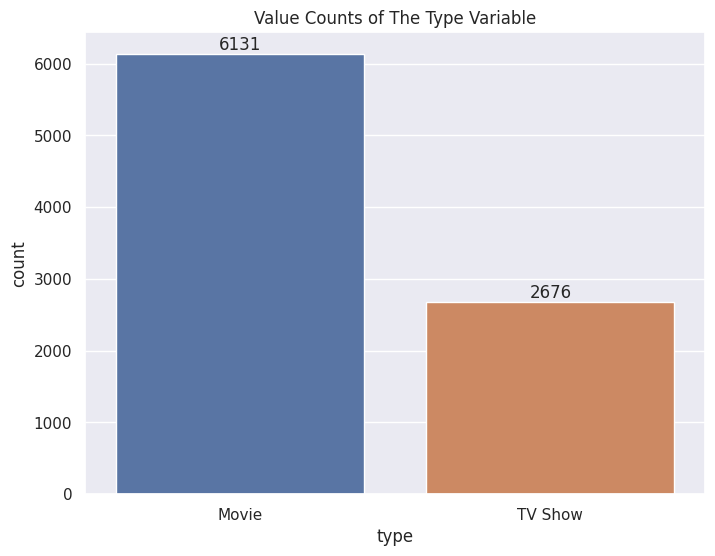

In [41]:
plt.figure(figsize=(8,6))
plt.title("Value Counts of The Type Variable")
cp = sns.countplot(x="type", data=df)
cp.bar_label(cp.containers[0])

The most types of shows that have been released on Amazon Prime are movie shows compared to TV shows, specifically movies with 69.62% and TV shows with 30.38%.

[Text(0, 0, '0'),
 Text(0, 0, '1147'),
 Text(0, 0, '0'),
 Text(0, 0, '733'),
 Text(0, 0, '323'),
 Text(0, 0, '176'),
 Text(0, 0, '195'),
 Text(0, 0, '2'),
 Text(0, 0, '94'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '5'),
 Text(0, 0, '1'),
 Text(0, 0, '0')]

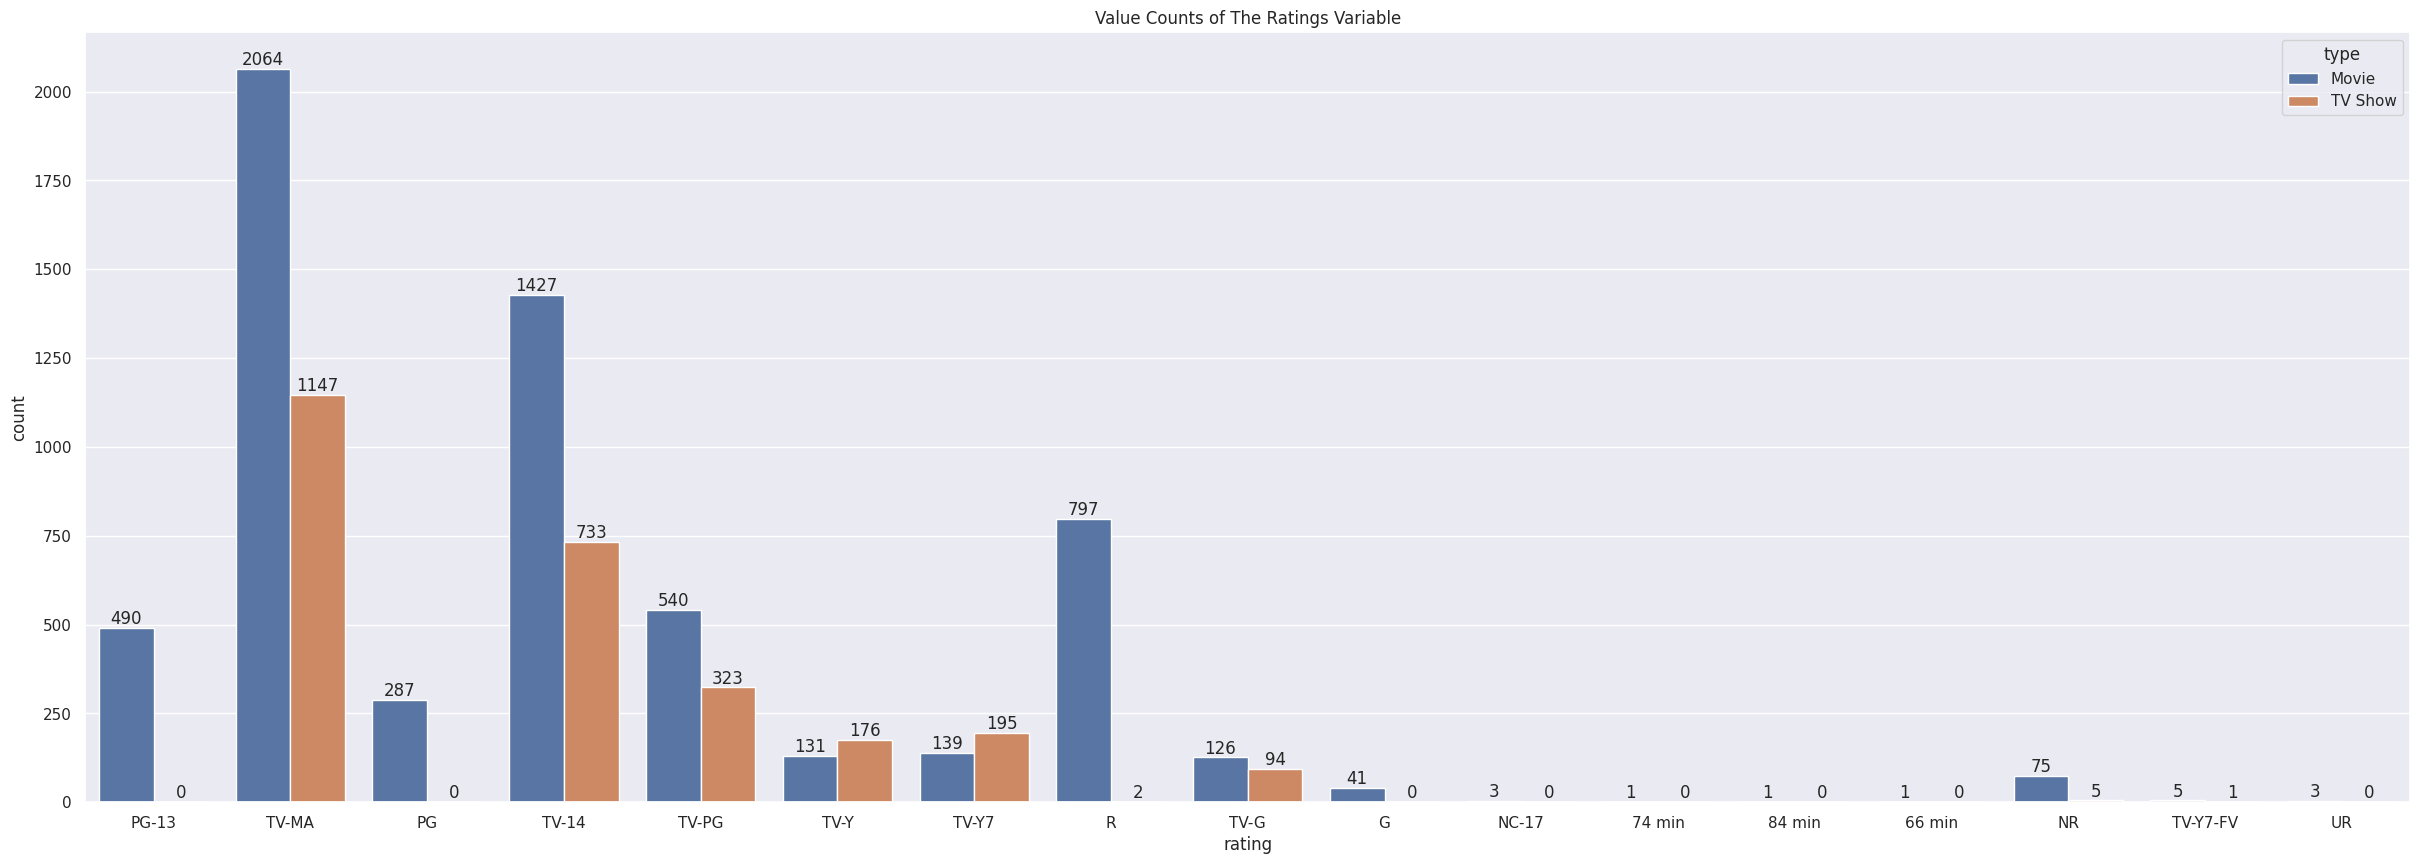

In [46]:
plt.figure(figsize=(30,10))
cp = sns.countplot(x="rating", data=df, hue = 'type')
plt.title("Value Counts of The Ratings Variable")
cp.bar_label(cp.containers[0])
cp.bar_label(cp.containers[1])

Rating of the shows that the most added on Amazon Prime was from 13+ rate

In [52]:
df.rename(columns={'listed_in':'categories'},inplace=True)
df

,type,title,director,cast,country,date_added,release_year,rating,duration,categories
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data Found,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,TV Show,Blood & Water,No Data Found,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,Jailbirds New Orleans,No Data Found,No Data Found,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,TV Show,Kota Factory,No Data Found,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...,...,...,...,...,...,...,...,...
8802,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers"
8803,TV Show,Zombie Dumb,No Data Found,No Data Found,United States,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies"
8804,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies"
8805,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies"


[Text(0, 0, '362'),
 Text(0, 0, '359'),
 Text(0, 0, '334'),
 Text(0, 0, '274'),
 Text(0, 0, '252'),
 Text(0, 0, '220'),
 Text(0, 0, '215'),
 Text(0, 0, '201'),
 Text(0, 0, '186'),
 Text(0, 0, '180')]

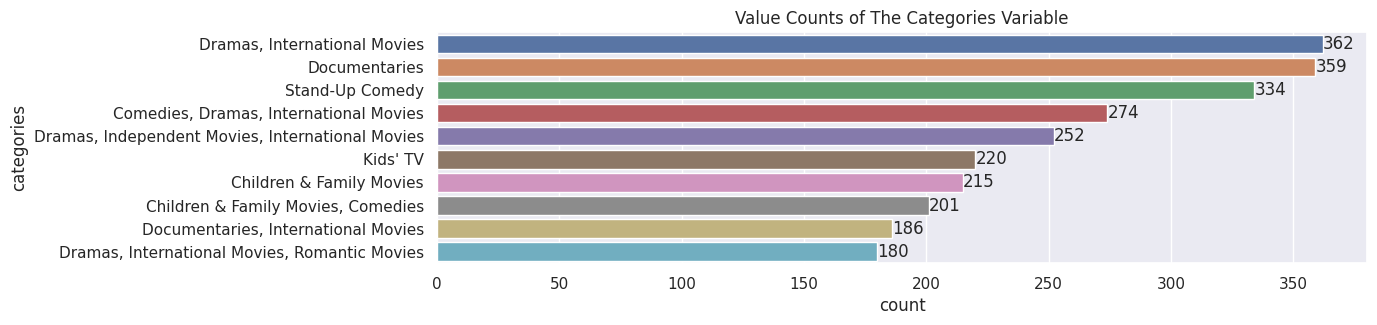

In [53]:
plt.figure(figsize=(12,3))
plt.title("Value Counts of The Categories Variable")
cp = sns.countplot(y="categories", data=df, order=df.categories.value_counts().iloc[:10].index)
cp.bar_label(cp.containers[0])

In [62]:
country = df['country'].value_counts().head(10)
print(country)

United States     3649
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: country, dtype: int64


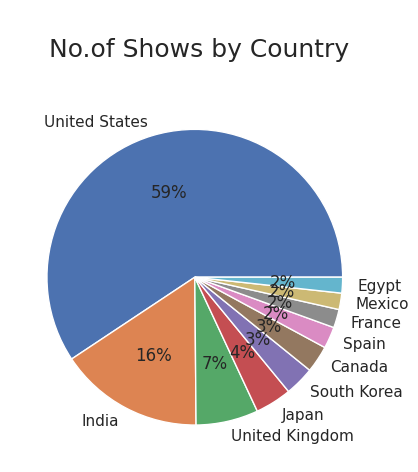

In [68]:
country = df['country'].value_counts().head(10)
ct = df['title'].value_counts()
plt.pie(data=ct, x=country.values, labels=country.index, autopct='%.f%%')
plt.title("\n No.of Shows by Country\n", fontsize=18)
plt.show()

Based on the data, the top 3 countries that released the most TV shows and movies on Amazon Prime respectively were the United States, India, and the United Kingdom.

[Text(0, 0, '2634'),
 Text(0, 0, '19'),
 Text(0, 0, '18'),
 Text(0, 0, '16'),
 Text(0, 0, '16'),
 Text(0, 0, '14')]

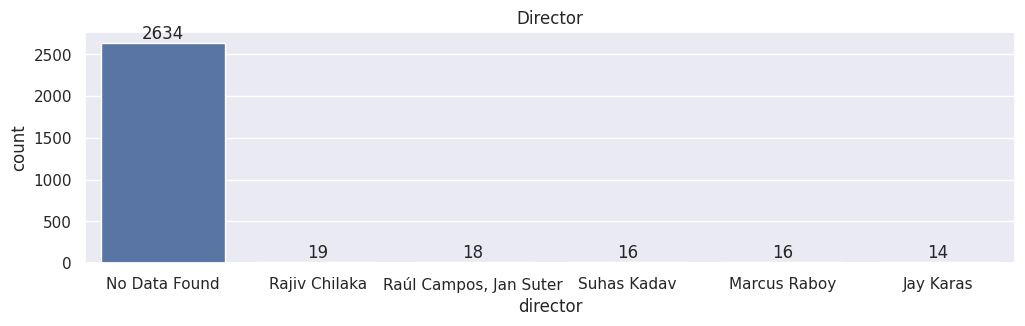

In [67]:
plt.figure(figsize=(12,3))
plt.title("Director")
ct = sns.countplot(x="director", data=df, order=df.director.value_counts().iloc[:6].index)
ct.bar_label(ct.containers[0])

#Number of Show - Year by Year

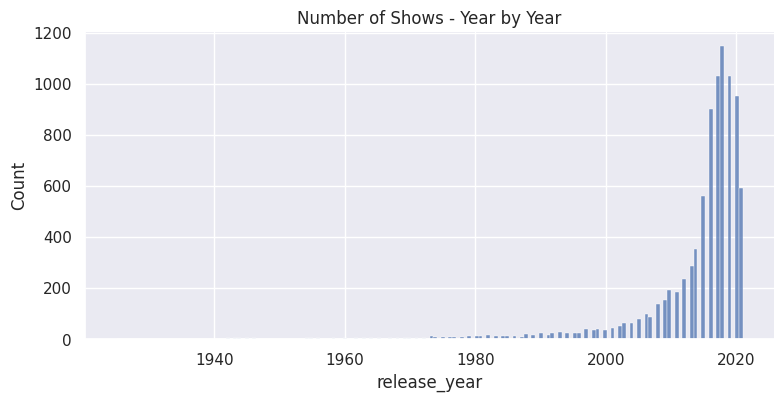

In [70]:
dt = sns.displot(data = df ,x="release_year", height=4,aspect=2)
dt.set(title='Number of Shows - Year by Year')

Shows that released the most on Amazon Prime were from year of 2021

#Conclusion
*   Amazon Prime Video uploads more movie shows than TV shows
*   Most uploaded shows on amazon prime video are from the US
*   Majority of the Movies and TV Shows are released in-between 2015 – 2020
*   Amazon prime video has the most uploads in the drama, international movie category
*   Shows uploaded on amazon prime videos are mostly directed by Rajiv Chilaka
*   The most uploaded show rating on amazon prime video is TV-MA (Mature Audience)